In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential, load_model, save_model, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data_folder = 'brain_tumor_final//'

train_dir = data_folder + "train//"
val_dir = data_folder + "val//"
test_dir = data_folder + "test//"

data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, 
                             zoom_range = 0.15,
                             rotation_range = 7,
                             width_shift_range=0.15,  
                             height_shift_range=0.1,  
                             horizontal_flip=True)

train_gen = data_gen.flow_from_directory(train_dir,
                                           target_size = (357, 328),
                                           batch_size = 32,
                                           shuffle = True,
                                           color_mode = 'rgb',
                                            class_mode = 'binary')

val_test_gen = ImageDataGenerator(rescale = 1./255)

val_gen = val_test_gen.flow_from_directory(val_dir,
                                      target_size = (357, 328),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'rgb',
                                      class_mode = 'binary')

test_gen = val_test_gen.flow_from_directory(test_dir,
                                      target_size = (357, 328),
                                      batch_size = 1,
                                      shuffle = False,
                                      color_mode = 'rgb',
                                      class_mode = 'binary')

Found 2277 images belonging to 2 classes.
Found 488 images belonging to 2 classes.
Found 488 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape = (357, 328, 3 )))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 64, kernel_size=3))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 128, kernel_size=3))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 256, kernel_size=3))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(units=256))
model.add(LeakyReLU())
model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)

model.compile(optimizer = optimizer, 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

stop = EarlyStopping(patience = 10, monitor = 'val_loss')
history = model.fit(x = train_gen, validation_data = val_gen, epochs = 1, shuffle = True, callbacks=[stop])

72/72 [==============================] - 62s 786ms/step - loss: 0.6690 - accuracy: 0.5905 - val_loss: 0.4679 - val_accuracy: 0.7889


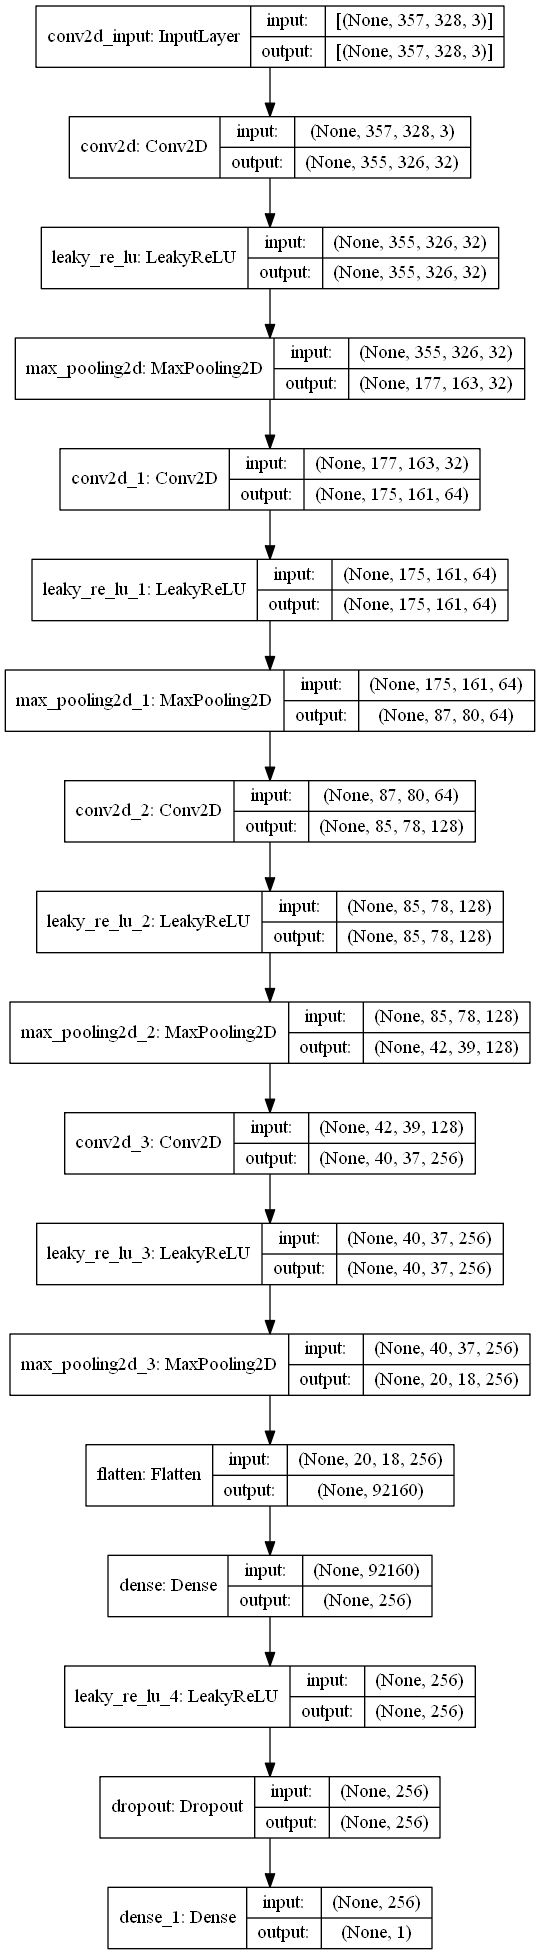

In [4]:
plot_model(model, show_shapes= True)

In [7]:
save_model(model, 'final_model.h5')